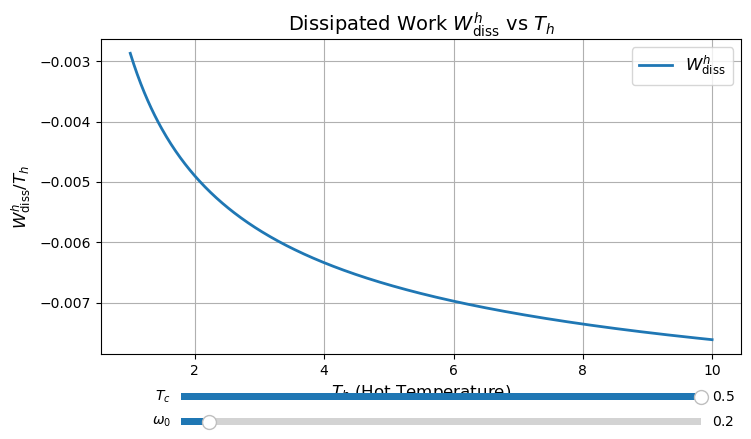

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Define constants
initial_omega_0 = 0.2  # Initial value of ω_0
initial_T_c = 0.5  # Initial value of cold temperature
T_h_min, T_h_max = 1.0, 10.0  # Range for hot temperatures
num_points = 500  # Number of points for T_h

# Function to compute W_diss^h
def compute_W_diss_h(omega_0, T_c):
    beta_c = 1 / T_c  # β_c = 1 / T_c
    T_h_values = np.linspace(T_h_min, T_h_max, num_points)
    W_diss_h_values = []
    for T_h in T_h_values:
        factor_1 = (
            0.5 * np.log((1 + np.exp(-beta_c * omega_0)) / 2)
            + 0.5*beta_c * omega_0 * np.exp(-beta_c * omega_0) / (1 + np.exp(-beta_c * omega_0))
        )
        factor_2 = (T_h - T_c)
        factor_3 = 1 + np.sqrt(T_c / T_h)
        W_diss_h = factor_1 * factor_2 / (T_h*factor_3)
        W_diss_h_values.append(W_diss_h)
    return T_h_values, np.array(W_diss_h_values)

# Initialize T_h and W_diss^h values
T_h_values, W_diss_h_values = compute_W_diss_h(initial_omega_0, initial_T_c)

# Create the figure and plot
fig, ax = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(left=0.1, bottom=0.25)
line, = ax.plot(T_h_values, W_diss_h_values, label=r"$W_{\mathrm{diss}}^h$", lw=2)

# Add labels, title, and grid
ax.set_xlabel(r"$T_h$ (Hot Temperature)", fontsize=12)
ax.set_ylabel(r"$W_{\mathrm{diss}}^h/T_h$", fontsize=12)
ax.set_title(r"Dissipated Work $W_{\mathrm{diss}}^h$ vs $T_h$", fontsize=14)
ax.grid(True)
ax.legend(fontsize=12)

# Define sliders for ω_0 and T_c
ax_omega_0 = plt.axes([0.2, 0.1, 0.65, 0.03])  # Slider position for ω_0
ax_T_c = plt.axes([0.2, 0.15, 0.65, 0.03])  # Slider position for T_c

slider_omega_0 = Slider(ax_omega_0, r"$\omega_0$", 0.1, 2.0, valinit=initial_omega_0, valstep=0.01)
slider_T_c = Slider(ax_T_c, r"$T_c$", 0.1, 0.5, valinit=initial_T_c, valstep=0.01)

# Update function for sliders
def update(val):
    omega_0 = slider_omega_0.val
    T_c = slider_T_c.val
    T_h_values, W_diss_h_values = compute_W_diss_h(omega_0, T_c)
    line.set_xdata(T_h_values)
    line.set_ydata(W_diss_h_values)
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle()

# Connect sliders to update function
slider_omega_0.on_changed(update)
slider_T_c.on_changed(update)

# Show the interactive plot
plt.show()
